# Session 14

In [4]:
# Import necessary libraries 
import pandas as pd 

import matplotlib.pyplot as plt 
%matplotlib inline  
#Graphic
import seaborn as sns 

# Read Super market Ecommerce Data USA

df = pd.read_excel('d:\Work\Cources\AI Academy\G3 Summer Online 2024\E-commerce-Super_market_USA.xlsx')

## Visualization 11: Clustered Bar Chart - Sales by Product Category and Gender:
Displaying sales counts based on product category and Gender using a clustered bar chart.

In [5]:
df.sample()

,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7138,7139,2015-11-20,2015-11-27,Standard Class,SS-20875,Sung Shariari,Consumer,United States,Miami,Florida,33180,South,OFF-BI-10004593,Office Supplies,Binders,Ibico Laser Imprintable Binding System Covers,62.88,4,0.7,-50.304


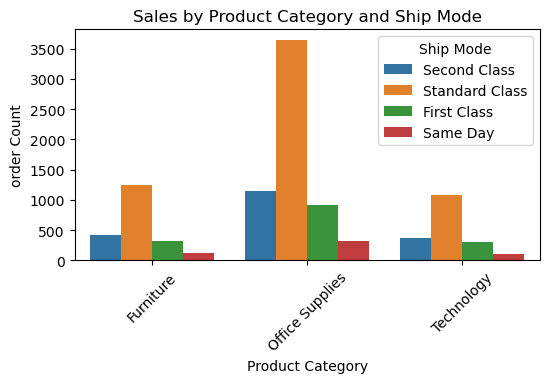

In [8]:
plt.figure(figsize=(6,3)) 

sns.countplot(x='Category',
               hue='Ship Mode',
               data=df)
    
plt.xlabel('Product Category') 
plt.ylabel('order Count') 
plt.title('Sales by Product Category and Ship Mode') 
plt.xticks(rotation=45) 
plt.legend(title='Ship Mode') 
plt.show()

## Visualization 12: Donut Chart - Sales Distribution by Product Category: 
Illustrating the percentage distribution of sales among different product categories using a donut chart.

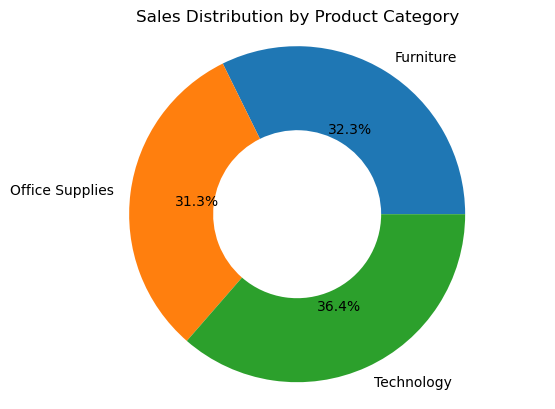

In [9]:
product_category_sales = df.groupby('Category')['Sales'].sum()

plt.pie(product_category_sales,
        labels=product_category_sales.index,
        autopct='%1.1f%%', 
        wedgeprops=dict(width=0.5)
               ) 

plt.title('Sales Distribution by Product Category') 
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle. 
plt.show()

## Visualization 13: Word Cloud - Most Frequent Product Categories: 

Generating a word cloud to visualize the most frequent product categories based on their occurrences.

In [10]:
df.sample()

,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
593,594,2014-01-09,2014-01-13,Standard Class,MS-17830,Melanie Seite,Consumer,United States,Laredo,Texas,78041,Central,TEC-AC-10001266,Technology,Accessories,Memorex Micro Travel Drive 8 GB,31.2,3,0.2,9.75


In [ ]:
df.nunique()

Row ID           9994
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [ ]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [ ]:
# !pip install wordcloud

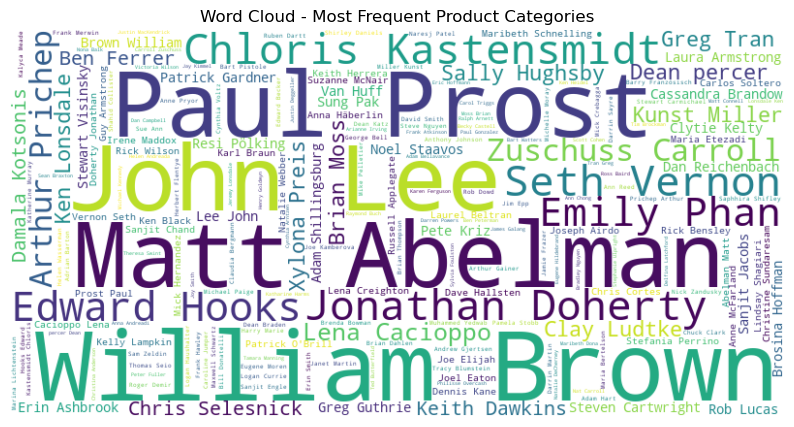

In [ ]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').\
            generate(' '.join(df['Customer Name'])) 

plt.figure(figsize=(10, 6)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Word Cloud - Most Frequent Product Categories') 
plt.show()

## Visualization 14: Bar Chart - Sales by Age group 


In [13]:
ecom = pd.read_csv('d:\Work\Cources\AI Academy\G2 Spring Online 2024\Session 10\ecommerce_sales.csv')

In [14]:
ecom.sample()

,Company_ID,Purchase_Date,Product_Category,Quantity,Total_Sales,Gender,Marital_Status,Price_Per_Unit,Customer_Type,Age
5572,4,2021-10-28,Books,1,245.463361,Male,Widowed,5.324675,Returning Customer,69


binning 

categorization 

Age       20 5 16 8 9 23 32 45 65 

AgeGroup  0-20   20-30  30-45  45-60 60-100

In [15]:
labels = ["<20", "20-30", "30-45", "45-60", ">60"]

# Define the bins and labels for categorization
bins = [0, 20, 30, 45, 60, 100]

# bins  = labels + 1

# Categorize the ages
ecom['AgeGroup'] = pd.cut(ecom['Age'],
                          bins=bins,
                        labels=labels,
                        #  right=False,
                        #   include_lowest=True
                          )


In [16]:
ecom['AgeGroup'].value_counts()

AgeGroup
>60      3138
30-45    2434
45-60    2335
20-30    1641
<20       452
Name: count, dtype: int64

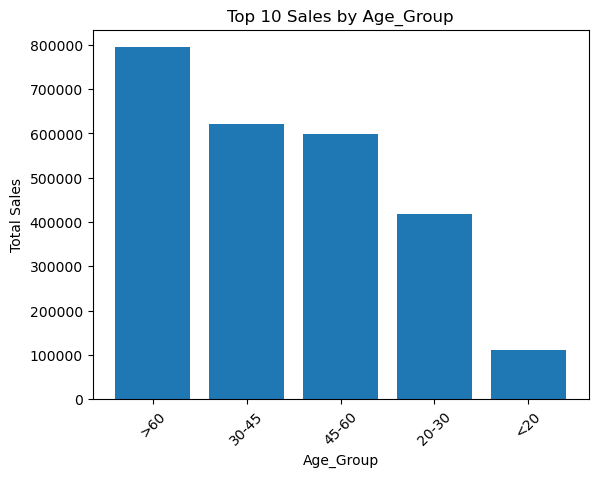

In [17]:
Age_sales = ecom.groupby('AgeGroup')['Total_Sales'].sum().nlargest(10) 

plt.bar(Age_sales.index, Age_sales.values) 

plt.xticks(rotation=45) 
plt.xlabel('Age_Group') 
plt.ylabel('Total Sales') 
plt.title('Top 10 Sales by Age_Group') 
plt.show()

## Visualization 15: Stacked Line Plot - Sales Trend by Customer Type and Gender 
This line plot displays the total sales trend over time for different customer types (e.g., new customers, returning customers), categorized by gender. It provides insights into how sales are evolving over time for different customer segments.

In [18]:
df.sample()

,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4052,4053,2014-09-29,2014-10-03,Standard Class,SM-20950,Suzanne McNair,Corporate,United States,Philadelphia,Pennsylvania,19134,East,FUR-TA-10004175,Furniture,Tables,"Hon 30"" x 60"" Table with Locking Drawer",409.272,2,0.4,-81.8544


In [22]:
customer_type_gender_sales = df.pivot_table(index='Ship Date',
                                             columns=['Category'],#, 'Segment'],
                                               values='Sales',
                                                 aggfunc='sum',
                                                 fill_value=0
                                                 )

In [23]:
customer_type_gender_sales

Category,Furniture,Office Supplies,Technology
Ship Date,,,
2014-01-07,0.0000,29.228,0.000
2014-01-08,0.0000,307.500,0.000
2014-01-10,2573.8200,653.120,1147.940
2014-01-12,76.7280,29.966,0.000
2014-01-13,0.0000,9.344,31.200
...,...,...,...
2018-01-01,1970.7228,419.432,0.000
2018-01-02,469.4280,773.820,302.376
2018-01-03,323.1360,155.208,90.930


In [ ]:
customer_type_gender_sales.resample('M').sum()

Category,Furniture,Office Supplies,Technology
Ship Date,,,
2014-01-31,5618.8590,4512.982,3143.290
2014-02-28,2463.3240,1334.694,1608.510
2014-03-31,11468.0530,7363.426,31876.870
2014-04-30,10189.4560,10597.021,9601.988
2014-05-31,7418.6160,8488.816,6571.448
2014-06-30,12247.1356,12276.337,11468.183
2014-07-31,9865.7040,16091.680,7033.210
2014-08-31,9405.4000,10891.268,9948.574
2014-09-30,19658.4753,23314.780,30153.398


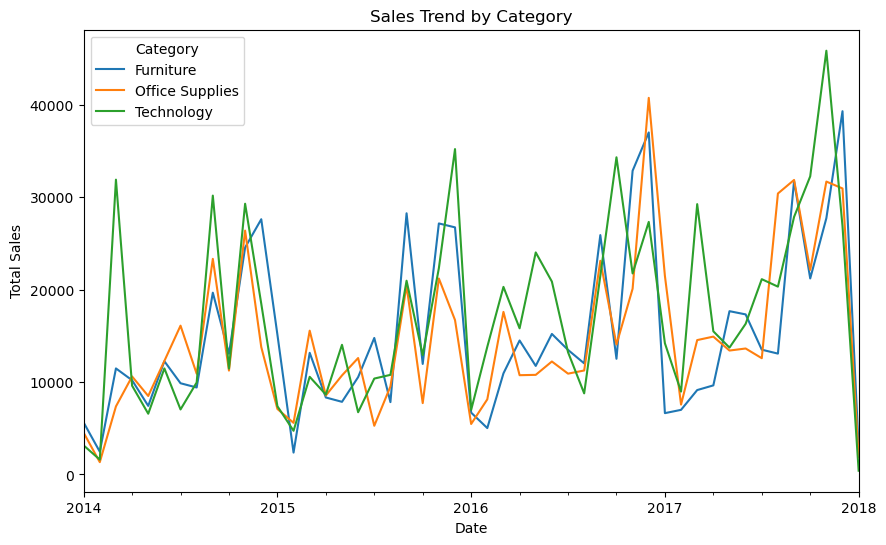

In [26]:
# df['Ship Date'] = pd.to_datetime(df['Ship Date'])
customer_type_gender_sales = df.pivot_table(index='Ship Date',
                                             columns=['Category'],#, 'Segment'],
                                               values='Sales',
                                                 aggfunc='sum')

customer_type_gender_sales.resample('M').sum().plot(kind='line', figsize=(10, 6))
plt.xlabel('Date') 
plt.ylabel('Total Sales') 
plt.title('Sales Trend by Category') 
plt.show()

## Visualization 16: Clustered Count Plot - Sales by Month and Customer Type 
The count plot shows the number of sales made in each month, categorized by customer type (e.g., new customers, returning customers). It helps understand the monthly sales patterns for different customer segments

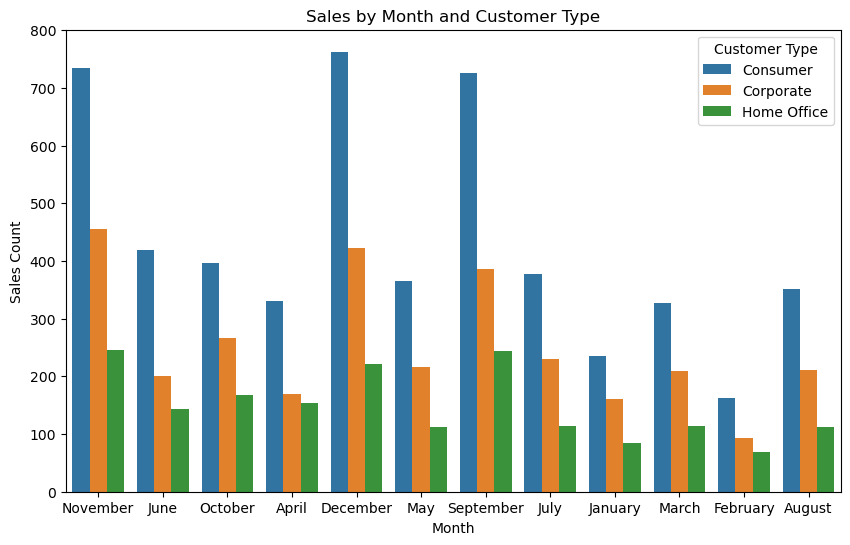

In [28]:
df['Month'] = df['Ship Date'].dt.month_name()
 
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Month',
               hue='Segment',
                 data=df) 
plt.xlabel('Month') 
plt.ylabel('Sales Count') 
plt.title('Sales by Month and Customer Type') 
plt.legend(title='Customer Type', bbox_to_anchor=(1, 1)) 
plt.show()

Task 

-  Exgtact  day name

- apply on another feature

We finished static visualization 

1- Pandas   plot

2- matplotlib   plt

3- seaborn    sns

# Plotly 

Plotly is a Montreal-based AI and Analytics company. They focus on the development of Analytics tools, mainly Dash and Chart Studio. They have also released the free and open-source plotting library “Plotly” for Python, R, MatLab, and Julia.

Plotly produces interactive graphs, can be embedded on websites, and provides a wide variety of complex plotting options. The graphs and plots are robust, and a wide variety of people can use them. The visuals are of high quality and easy to read and interpret.

Plotly can be used to make a wide variety of charts, including Basic and Statistical charts, Maps, 3D Charts, Subplots, and so on.

In [ ]:
# !pip install plotly

In [34]:
import numpy as np 
import pandas as pd 

import plotly.express as px

Now, we read some data we will be using.


- Melbourne Housing Snapshot


- The Melbourne Housing data has various real estate data points and deals with the housing sector. The data pertains to the housing and commercial property sector.



In [30]:
melb= pd.read_csv("d:\Work\Cources\AI Academy\G3 Summer Online 2024\AI-DS-Online-Diploma-Summer-Semester-2024\Session 14\melb_data.csv")
melb.shape

(13580, 21)

In [32]:
melb.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
10209,Coburg North,2/4 Manly Ct,2,t,525000.0,VB,Raine,27/05/2017,6.7,3058.0,...,2.0,1.0,143.0,102.0,NaN,Moreland,-37.72037,144.97023,Northern Metropolitan,3445.0
4973,Preston,19 Railway Pl,3,h,750000.0,SP,Ray,18/06/2016,8.8,3072.0,...,1.0,2.0,409.0,NaN,NaN,Darebin,-37.74860,144.99920,Northern Metropolitan,14577.0
2206,Eaglemont,34 Durham St,3,h,1601000.0,S,Miles,26/07/2016,10.3,3084.0,...,1.0,1.0,872.0,136.0,1960.0,Banyule,-37.76180,145.06490,Eastern Metropolitan,1651.0
10306,Greensborough,5 Glenice St,3,h,740000.0,S,Darren,27/05/2017,16.1,3088.0,...,1.0,3.0,580.0,142.0,1962.0,Banyule,-37.71536,145.10205,Northern Metropolitan,8524.0
13145,Cheltenham,72 Wilson St,3,h,1160000.0,S,O'Brien,23/09/2017,17.9,3192.0,...,2.0,2.0,534.0,134.0,1980.0,NaN,-37.95830,145.06041,Southern Metropolitan,9758.0


The Melbourne data is a bit large. For the sake of simplicity, we are taking only 1000 data points from the dataset.

## Visualization 17: Scatter Plots Using Plotly 

In [35]:
x=[0, 1, 2, 3, 4, 5, 6]
y=[0, 2, 4, 5, 5.5, 7, 9]
fig = px.scatter(x, y)
fig.show()

## Visualization 18: Scatter Plots Using Plotly 

In [36]:
fig = px.scatter(melb, y="Lattitude", x="Longtitude",  # Numerical
                 
                        color="Regionname", # hue  # Categorical
                        
                        width =600,height = 600,
                        
                        # marginal_y="histogram", marginal_x="rug"
                        )
# fig.update_layout(scene_aspectmode='data')
# plt.figure(figsize=(3,2))
fig.show()

## Visualization 20: Scatter Plots with Price and year with color = room 

In [ ]:
# melb['Rooms'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1000 entries, 11028 to 7758
Series name: Rooms
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 15.6 KB


In [ ]:
# melb['Rooms'] = melb['Rooms'].astype('category')
# melb['Rooms'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1000 entries, 11028 to 7758
Series name: Rooms
Non-Null Count  Dtype   
--------------  -----   
1000 non-null   category
dtypes: category(1)
memory usage: 9.1 KB


In [38]:
fig = px.scatter(melb, y="Price", x="YearBuilt", color="Rooms",
             facet_col="Type",
             width =600,height = 600, )
fig.show()

## Visualization 22: Scatter Plots with BuildingArea and Distance with color = rooms 

In [ ]:
fig = px.scatter(melb, x="BuildingArea",width =600,height = 600,
                  y="Distance", color="Rooms", facet_col="Type", )
fig.show()

## Visualization 24-28:Line Plots Using Plotly

Line plots are great for visualizing continuous data. Time series data, mathematical functions, etc., are some of the data which can be plotted using Line Plots. They reveal data trends, maxima, and minima. We can use them for time series data like stocks, sales over time, and so on. It is a great way to plot a 2D relationship.

In [39]:
px.data.stocks()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


In [41]:
df1 = px.data.stocks()
fig = px.line(df1,
               x='date',
                 y="MSFT")
fig.show()

In [42]:
df1 = px.data.stocks()
fig = px.line(df1, x='date', y=["MSFT",'FB'])
fig.show()

In [ ]:
df1 = px.data.stocks()
df1.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


Now, I will include more stocks in the plot.

GOOG stands for Google, FB stands for Facebook, and AMZN stands for Amazon

In [ ]:
df1 = px.data.stocks()
fig = px.line(df1, x='date', y=df1.columns)#["MSFT","GOOG",'FB',"AMZN"])
fig.show()


## Visualization 31-36: Bar Plots Using Plotly

Barplots are used to provide a straightforward comparison of data. They represent categorical data with rectangular bars of variable height. Plotting bar charts in a graphing library like Plotly is very easy and simple. Let us start by plotting the population of Australia over time.


In [43]:
df = px.data.gapminder()#.query("continent == 'Oceania' and year >= 1962")

In [44]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

In [ ]:
df.sample()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1068,Nepal,Asia,1952,36.157,9182536,545.865723,NPL,524


In [ ]:
# px.data.gapminder().query("continent == 'Oceania' and year >= 1962")

task
 
1-Filter by continent = asia

2- year after 1970

.query("continent == 'Oceania' and year >= 1962")

3- gdpper cap 

In [45]:
df = px.data.gapminder().query("continent == 'Oceania'")

fig = px.bar(df, x='year', y='gdpPercap',
             color = 'country',
            #  width =600,height = 600
            # barmode = 'group',
            #  width=5
             )
fig.update_layout(barmode='group',width=800)
fig.show()

In [ ]:
fig = px.bar(px.data.gapminder().query("continent == 'Asia'"), x="country", y="gdpPercap")
fig.show()

In [ ]:
fig = px.bar(px.data.gapminder(), x="continent", y="gdpPercap")
fig.show()

In [ ]:
# px.data.gapminder().info()

analyze the continent category, and for that, we bring in another parameter.

In [ ]:
# px.data.gapminder()['continent'].value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

In [ ]:
# df = px.data.gapminder().query("continent == 'Africa'")
# df = px.data.gapminder()
# px.data.gapminder()['continent'].value_counts()

In [ ]:
# fig = px.bar(df, x="country", y="pop",color='continent')
# fig.show()

In [ ]:
data.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

In [ ]:
data = px.data.gapminder()
# data_canada = data[data.country == 'Canada']

data_canada = data.query(" country == 'Canada' ")

fig = px.bar(data_canada, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'],
             color='lifeExp',
             labels={'pop':'population of Canada',
                     'year' : 'Year gh'},
             height=400)
fig.show()

In [ ]:
df = px.data.gapminder().query("continent == 'Oceania'")

fig = px.bar(df,
             x='year', y='pop',
             barmode='stack',
             color='country'
             )
fig.show()

In [ ]:
fig = px.bar(df, x='year', y='lifeExp',barmode='stack',color='country')
fig.show()

In [ ]:
import plotly.graph_objects as go


In [ ]:
x = ['Suzuki', 'Honda', 'Tata']
y = [100, 40, 60]

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['50 % Share', '20 % Share', '30 % Share'])],
            )
fig.update_layout(title_text='Sales Data')
fig.show()

## Visualization 36-39: Pie Chart Using Plotly

Pie charts are used to understand the composition of data and analyze part-to-whole relationships in data. Piecharts ( and doughnut charts) plot the percentage composition of a value as compared to the entire data/value.

In [ ]:
#setting colours
df = px.data.tips()
fig = px.pie(df, values='tip', names='day',
            #  color_discrete_sequence=px.colors.sequential.RdBu
             )
fig.show()

In [ ]:
labels = ['Apple','Microsoft','Amazon','Alphabet']
values = [2252, 1966, 1711, 1538]
fig = go.Figure(data=[go.Pie(labels=labels, values=values,
                              textinfo='label+percent',
                            #  insidetextorientation='radial'
                            )])
fig.show()


In [ ]:
#donut chart
labels = ['CAR','BIKE','BUS','TRAIN']
values = [1500, 2500, 6800, 9000]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,
                             textinfo='label+percent',
                              hole=.3)])
fig.show()

In [ ]:
#donut chart
labels = ['CAR','BIKE','BUS','TRAIN']
values = [1500, 2500, 6800, 9000]
fig = go.Figure(data=[go.Pie(labels=labels, values=values,
             pull=[0.0, 0.1, 0.2, 0.1])])
fig.show()

## Visualization 44-47:Box Plots Using Plotly

Box Plots are a great way to understand data distribution. They depict numerical data using quartiles.

In [ ]:
stud = pd.read_csv('d:\Work\Cources\AI Academy\G4 Summer offline\Session 9\Visualizations\StudentsPerformance.csv')

In [ ]:
stud

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
fig = px.box(stud, x='gender',y="math score",
              points="all")
fig.write_html('BOX.html')
fig.show()

## Visualization 48-50:Histograms

Histogram widgets are an excellent plot to understand the frequency distribution of numerical data.

In [ ]:
fig = px.histogram(stud, x="math score", nbins=20, color="gender")
fig.show()

# Useful resources
Useful resources that can help the readers of this guidebook:

• Pandas Documentation: Official documentation for the Pandas library, providing comprehensive information on data manipulation and analysis 
using Pandas. URL: https://pandas.pydata.org/docs/

• Seaborn Documentation: Official documentation for the Seaborn library, offering detailed guidance on creating attractive statistical visualizations. URL: https://seaborn.pydata.org/documentation.html

• Matplotlib Documentation: Official documentation for Matplotlib, a widely-used plotting library for Python, with detailed examples and tutorials. URL: https://matplotlib.org/stable/contents.html

• Faker Documentation: Documentation for the Faker library, used for generating fake data, such as names, addresses, and more, to facilitate testing and visualization. URL: https://faker.readthedocs.io/en/master/

• WordCloud Documentation: Official documentation for WordCloud, providing guidance on creating visualizations of word clouds based on word frequencies. URL: https://github.com/amueller/word_cloud

• DataCamp - Data Visualization with Seaborn: A tutorial on DataCamp that covers various data visualization techniques using Seaborn library. URL: https://www.datacamp.com/courses/data-visualization-with-seaborn

• Towards Data Science: An online publication featuring articles, tutorials, and resources related to data science, machine learning, and data visualization. URL: https://towardsdatascience.com/

• Kaggle Datasets: A platform to explore and download various datasets for practice and analysis, including visualization projects. URL: https://www.kaggle.com/datasets

• Stack Overflow: A popular Q&A platform where users can find solutions to their coding questions, including data visualization-related issues. URL: https://stackoverflow.com/